In [1]:
import pandas as pd

In [12]:
filepath = './../../data/data_splits_stratified/6-2-2_all_classes_enriched_with_kw/'

In [13]:
train_file = f"{filepath}train.csv"
val_file = f"{filepath}val.csv"
test_file = f"{filepath}test.csv"
# Read train, val, and test data
train_data = pd.read_csv(train_file)
val_data = pd.read_csv(val_file)
test_data = pd.read_csv(test_file)
df = pd.concat([train_data, val_data, test_data])
print(10*'*', 'Split statisistics', 10*'*')
print('Train:', len(train_data))
print('Val:', len(val_data))
print('Test:', len(test_data))
print('Total:', len(df))

********** Split statisistics **********
Train: 1581
Val: 530
Test: 534
Total: 2645


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2645 entries, 0 to 533
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   idx             2645 non-null   int64 
 1   pmid            2645 non-null   int64 
 2   journal_name    2639 non-null   object
 3   title           2645 non-null   object
 4   abstract        2645 non-null   object
 5   keywords        866 non-null    object
 6   accepted_label  2645 non-null   object
 7   multi_label     2645 non-null   int64 
 8   binary_label    2645 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 206.6+ KB


In [15]:
2645/866

3.0542725173210163

In [25]:
print('Total n journals:',df.journal_name.nunique())

Total n journals: 1262


In [27]:
jounral_counts = df.groupby('journal_name').size().sort_values(ascending=False)
print(jounral_counts[:20])

journal_name
Scientific reports                                                        31
PloS one                                                                  26
The Journal of clinical psychiatry                                        21
Journal of affective disorders                                            20
Journal of Alzheimer's disease : JAD                                      19
Neurology                                                                 17
Psychiatry research                                                       17
Epilepsy & behavior : E&B                                                 16
Journal of neurosurgery                                                   16
Neurosurgery                                                              16
Brain research                                                            15
Psychopharmacology                                                        14
Journal of neurology, neurosurgery, and psychiatry             

In [30]:
df.binary_label.value_counts()

binary_label
0    2266
1     379
Name: count, dtype: int64

In [29]:
df.accepted_label.value_counts()

accepted_label
Remaining                              858
Non-systematic-review                  371
Human-non-RCT-non-drug-intervention    206
Human-non-RCT-drug-intervention        179
Human-case-report                      165
Animal-other                           155
Animal-drug-intervention               147
Human-systematic-review                110
In-vitro-study                         104
Human-RCT-non-drug-intervention         88
Animal-non-drug-intervention            77
Human-RCT-drug-intervention             73
Clinical-study-protocol                 58
Human-RCT-non-intervention              54
Name: count, dtype: int64

In [44]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from matplotlib import pyplot as plt


def computeVisualizeStats(df, level='char'):
    """Function to compute and visualize text statistics:
    - on char level
    - on token level
    """

    def compute_lengths(text):
        if level == 'char':
            return len(text)
        elif level == 'token':
            return len(word_tokenize(text))
        else:
            raise ValueError("specify 'char' or 'token'")

    label_statistics = {}
    for label, group in df.groupby('accepted_label'):
        title_lengths = group['title'].apply(compute_lengths)
        abstract_lengths = group['abstract'].apply(compute_lengths)
        label_statistics[label] = {
            'Title': {
                'Mean': title_lengths.mean(),
                'Min': title_lengths.min(),
                'Max': title_lengths.max()
            },
            'Abstract': {
                'Mean': abstract_lengths.mean(),
                'Min': abstract_lengths.min(),
                'Max': abstract_lengths.max()
            }
        }

    # Visualization
    labels = []
    title_means = []
    title_mins = []
    title_maxs = []
    abstract_means = []
    abstract_mins = []
    abstract_maxs = []

    for label, stats in label_statistics.items():
        labels.append(label)
        title_means.append(stats['Title']['Mean'])
        title_mins.append(stats['Title']['Min'])
        title_maxs.append(stats['Title']['Max'])
        abstract_means.append(stats['Abstract']['Mean'])
        abstract_mins.append(stats['Abstract']['Min'])
        abstract_maxs.append(stats['Abstract']['Max'])

    plt.figure(figsize=(12, 6)) # TODO decide on the facecolor
    plt.subplot(1, 2, 1)
    plt.scatter(labels, title_means, color='seagreen', label='Mean')
    plt.scatter(labels, title_mins, color='tomato', label='Min')
    plt.scatter(labels, title_maxs, color='darkslateblue', label='Max')
    plt.title('TITLE Length Statistics\n')
    plt.xlabel('Labels')
    plt.ylabel('Length')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=90)
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.scatter(labels, abstract_means, color='seagreen', label='Mean')
    plt.scatter(labels, abstract_mins, color='tomato', label='Min')
    plt.scatter(labels, abstract_maxs, color='darkslateblue', label='Max')
    plt.title('ABSTRACT Length Statistics\n')
    plt.xlabel('Labels')
    plt.ylabel('Length')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=90)
    plt.legend()



    plt.tight_layout()
    plt.show()

[nltk_data] Downloading package punkt to /Users/shtosti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


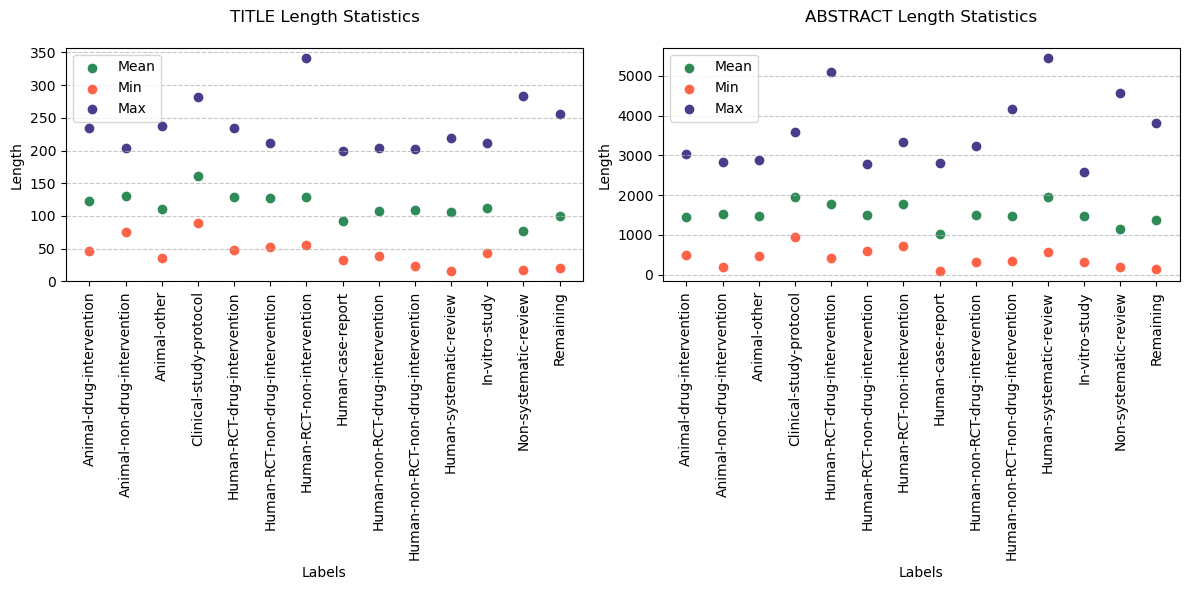

In [45]:
computeVisualizeStats(df, level='char')

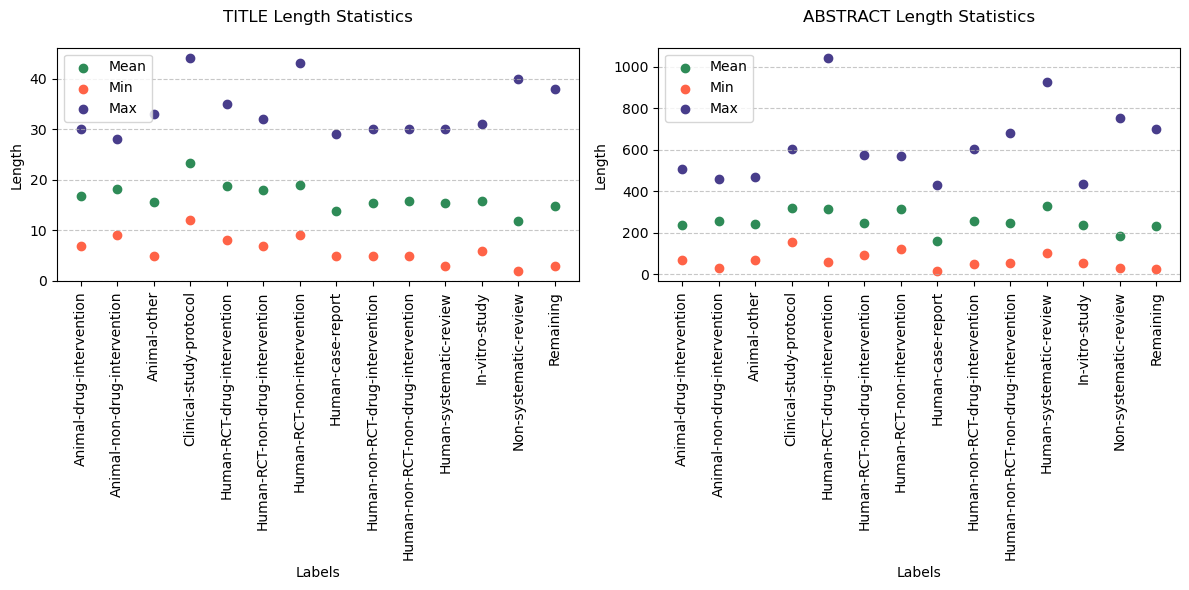

In [46]:
computeVisualizeStats(df, level='token')